### Medical Insurence Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(1)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

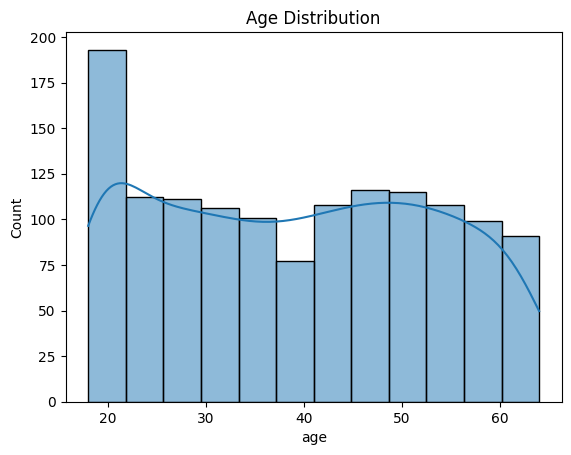

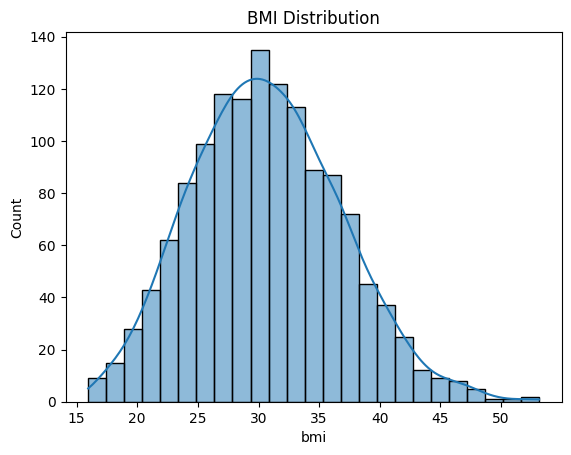

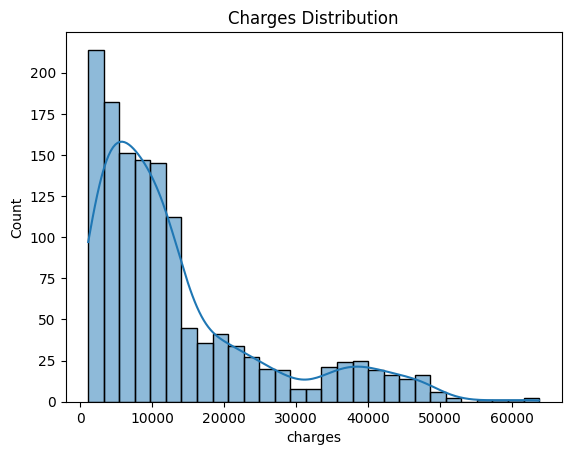

In [10]:

sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.show()



sns.histplot(data['bmi'], kde=True)
plt.title("BMI Distribution")
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title("Charges Distribution")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25576\573265444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


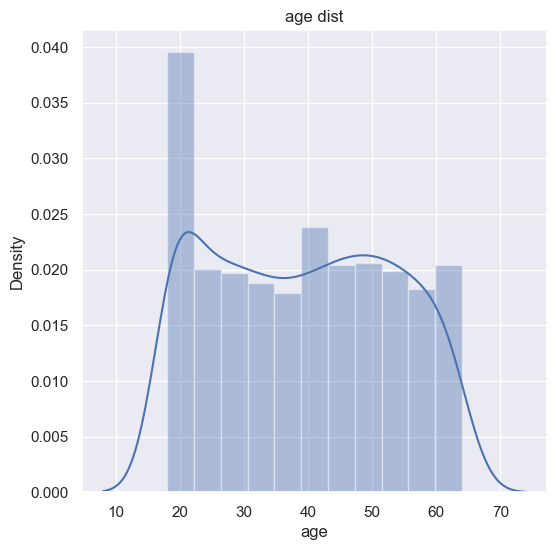

In [11]:
## age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["age"])
plt.title("age dist")
plt.show()

### ANALYSING THE CATEGORICAL VARIABLES

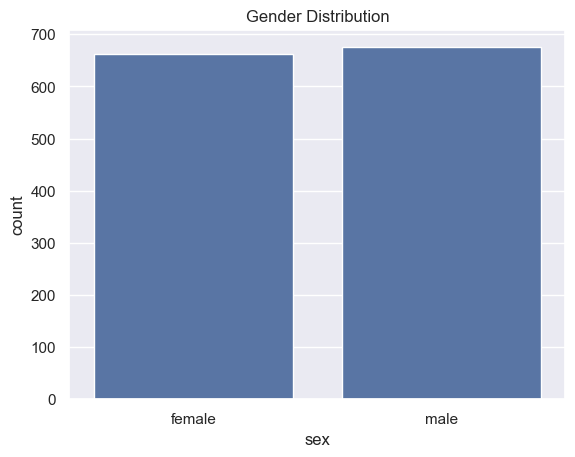

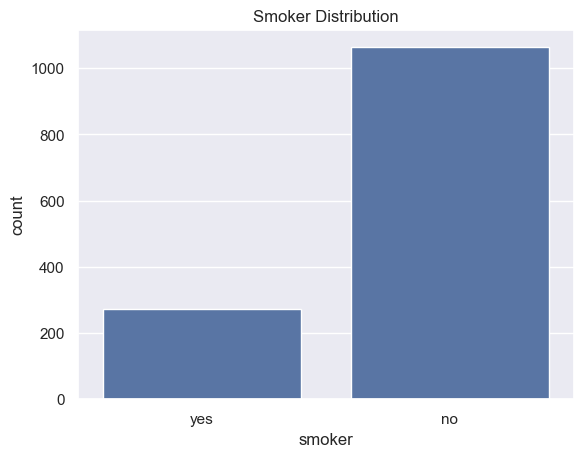

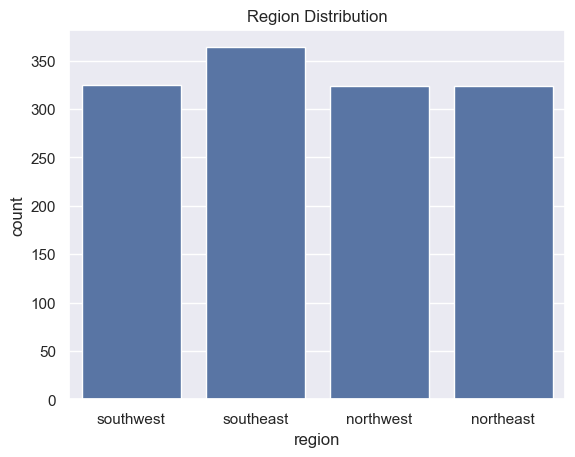

In [12]:
sns.countplot(x='sex', data=data)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='smoker', data=data)
plt.title("Smoker Distribution")
plt.show()

sns.countplot(x='region', data=data)
plt.title("Region Distribution")
plt.show()


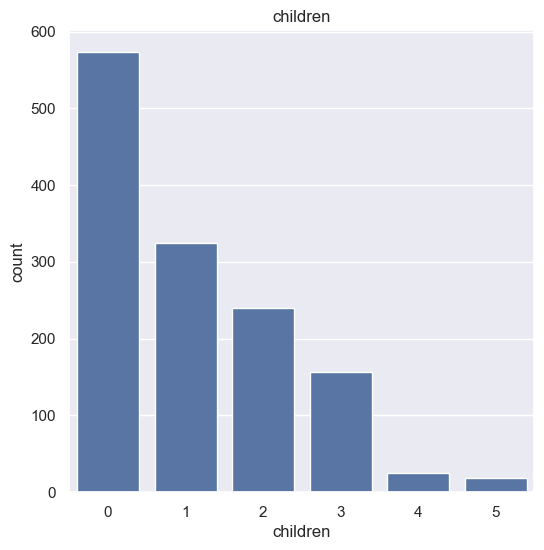

In [13]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=data)
plt.title("children")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])


In [15]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


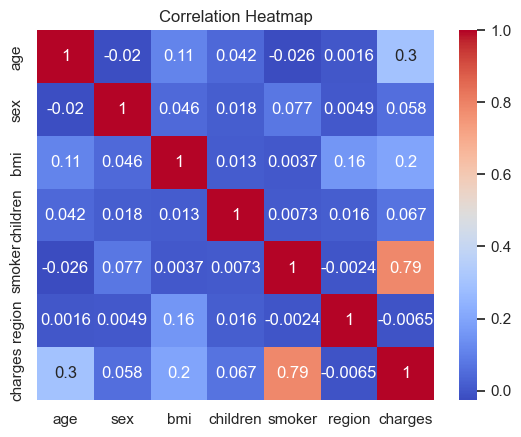

In [16]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
#in the case "smoker" and "charges" have a high correlation (0.79), ( smoking significantly affects medical insurance charges).

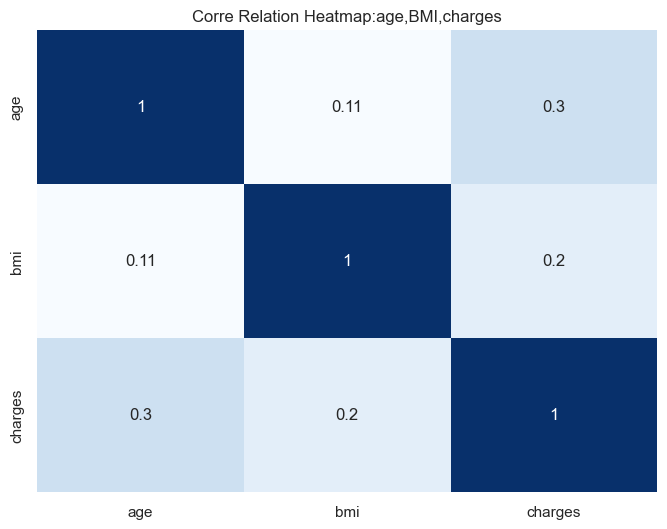

In [18]:
corr_data = data[["age","bmi","charges"]].corr()
plt.figure(figsize=(8,6))  
sns.heatmap(round(corr_data,2),annot=True,cmap="Blues",cbar=False)
plt.title("Corre Relation Heatmap:age,BMI,charges")
plt.show()

In [19]:
#age and charges have a moderate correlation (0.3).
#bmi and charges have a weaker correlation (0.2).

In [20]:
#smoker is the most important predictor for medical charges based on the correlation(smoker and charges (0.79):)
#age and bmi also contribute, but their influence is weaker.


In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
X = data.drop('charges', axis=1)
Y = data['charges']
X
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
Y_pred


array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [27]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [3480.71806706  -49.82673307 1890.9752842   637.82776712 9224.0941585
 -262.2899979 ]
Model Intercept: 13030.203369289053


In [28]:

# Convert to DataFrame for easy comparison
results = pd.DataFrame({"Actual": Y_test.values, "Predicted": Y_pred})
# Display first 10 rows
print(results.head(10))


        Actual     Predicted
0   8688.85885   8080.450186
1   5708.86700   5592.871120
2  11436.73815  14378.298655
3  38746.35510  31731.819541
4   4463.20510   9158.356944
5   9304.70190  13361.014269
6  38511.62830  30257.655258
7   2150.46900   1308.647356
8   7345.72660  10849.425445
9  10264.44210  11375.548519


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, Y_pred)  # Average absolute error
mse = mean_squared_error(Y_test, Y_pred)  # Squared error



r2 = r2_score(Y_test, Y_pred)  # How well model fits (closer to 1 = better)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 4182.35
Mean Squared Error (MSE): 35493102.61
R² Score: 0.8068


In [30]:
#input_data=(28,1,33,3,0,3)
input_data=(18,1,33.77,1,0,3)

#changing input data to a numpy array
numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=numpy_array.reshape(1,-1)
predictions=model.predict(input_data_reshaped)
print(predictions)
#1725.5523


#23,male,23.845,0,no,northeast,2395.17155
in_data=(23,1,23.845,0,0,1)
in_data_array=np.asarray(in_data)
in_data_array=in_data_array.reshape(1,-1)



[139342.49496406]


In [31]:

in_data=(10,1,23.845,0,1,1)
in_data_array=np.asarray(in_data)
in_data_array=in_data_array.reshape(1,-1)
insurence=model.predict(in_data_array)
insurence[0]

np.float64(101839.66711911254)

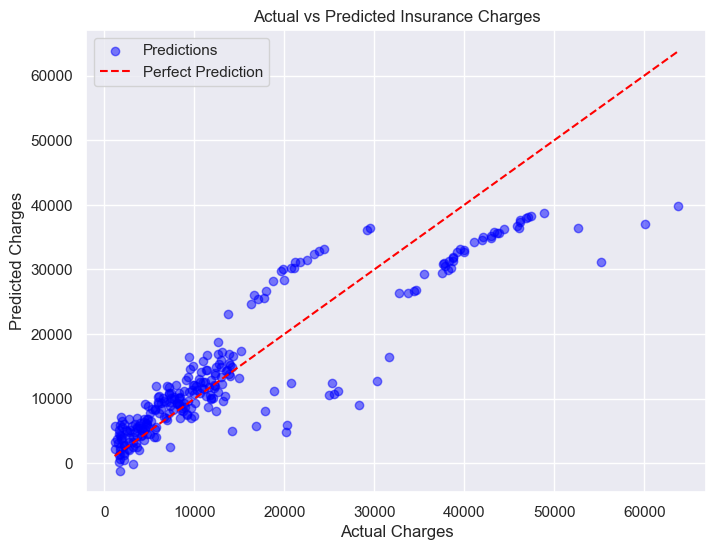

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed', label="Perfect Prediction")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.legend()
plt.show()


### random forest

In [33]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
#print(data.dtypes)


In [35]:
categorical_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store encoders

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Encoding
    label_encoders[col] = le

In [36]:
x = data.drop(columns=['charges'])
y = data['charges']
x


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=115, random_state=42)
rf_model.fit(x_train, y_train)

# Make Predictions
y_pred = rf_model.predict(x_test)
print(y_pred)


[ 9531.53223687  5511.37965696 28239.56610261 12418.42435904
 34683.40727565  8306.401436    2108.7710487  14549.96786757
  5346.53893539 10771.27356565 19425.67524452  7158.32705913
  4796.23600948 45992.89174522 48354.30374548 45392.74465922
  9829.81736435 43403.1046987   9094.14570948 24350.4819587
  8791.46245443 10404.4059047   1793.94637357  2172.79441261
 12030.63851435 11980.83120609 13417.93212374  7568.79789852
 10833.08314009  6569.61516997  8332.04044009 11811.87336478
  3354.05024539  5649.20469113  3876.70268235  9620.46582209
  2984.24935078  8123.05188948 23702.67931957 39416.46711261
  6213.38877104  3588.72518235 11994.41324948 14598.9782427
  5849.21089417 14675.71974565 15855.00667209  9364.14270478
 41989.74251861  8762.98794878 13987.43675174  2586.85776739
  6858.51314557  1871.30330809 13096.73709713 10627.03211043
  3278.91455522 45312.46345739 12157.33641026 15230.64968496
 13799.89736957  7086.90854035 20959.34053817  7812.21104104
 10478.00298513  6490.3156

In [39]:
## evaluating the random forest

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))

2550.338679079471


In [40]:
print(mean_squared_error(y_test,y_pred))

20926157.496219862


In [41]:
print(r2_score(y_test,y_pred))

0.8652088342678103


In [42]:
#Low MAE,High R2 score,minimal Overfitting

In [43]:
print("Expected feature count:", rf_model.n_features_in_)


Expected feature count: 8


In [44]:
rf_model.predict([[26, 20.8, 0, 1, 0, 0, 1, 0]])


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4188.314238])

In [45]:
##Step 2: Compare Linear Regression vs Random Forest

In [46]:
## 1. Mean Absolute Error (MAE)
Linear Regression: MAE = 4182.35
Random Forest: MAE = 2550.34
Interpretation:

The Random Forest model has a lower MAE, which means, on average, its predictions are closer to the true values. Lower MAE is generally preferred because it indicates fewer errors in the predictions.
Conclusion: Random Forest performs better in terms of average error.
2. Mean Squared Error (MSE)
Linear Regression: MSE = 35493102.61
Random Forest: MSE = 20926157.50
Interpretation:

MSE penalizes larger errors more than MAE (due to the squaring of the errors). A lower MSE is better, and Random Forest again has a smaller MSE, meaning it is doing a better job of reducing large prediction errors compared to Linear Regression.
Conclusion: Random Forest is performing better in terms of reducing larger errors.
3. R² Score
Linear Regression: R² = 0.8068
Random Forest: R² = 0.8652
Interpretation:

R² measures the proportion of the variance in the target variable that is explained by the model. A higher R² score indicates a better fit to the data.
The Random Forest model has a higher R², meaning it is explaining more of the variability in the target variable than Linear Regression.
Conclusion: Random Forest performs better in explaining the variance in the target variable.
Summary of Comparison:
Random Forest has a lower MAE, lower MSE, and higher R², which means it outperforms Linear Regression in all the key metrics.
The better performance of the Random Forest model is expected, as Random Forest can capture non-linear relationships in the data, while Linear Regression assumes a linear relationship.
Next Steps:
If you want to deepen your comparison:

Visual Comparison: You can plot the residuals (differences between predicted and actual values) for both models. This will show you how the errors are distributed.
Model Tuning: You can improve the Random Forest model by fine-tuning hyperparameters (e.g., adjusting the number of trees, depth of trees, etc.).
Cross-validation: Use cross-validation to evaluate the models' generalizability on different subsets of your data.

SyntaxError: invalid character '²' (U+00B2) (3859178614.py, line 15)

#### DECISION TREE REGRESSION

In [50]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
X = data.drop(columns=['charges'])
Y = data['charges']

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = dt_model.predict(X_test)


In [53]:
print(type(X_train))


<class 'numpy.ndarray'>


In [54]:
# Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred_dt)
mse = mean_squared_error(Y_test, Y_pred_dt)
r2 = r2_score(Y_test, Y_pred_dt)

# Print results
print(" MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


 MAE: 2593.359839584189
MSE: 19778189.6505053
R² Score: 0.892367145793449


In [55]:
import pandas as pd

# Assign column names if you have them
feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]  # Auto-generate if unknown

# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)


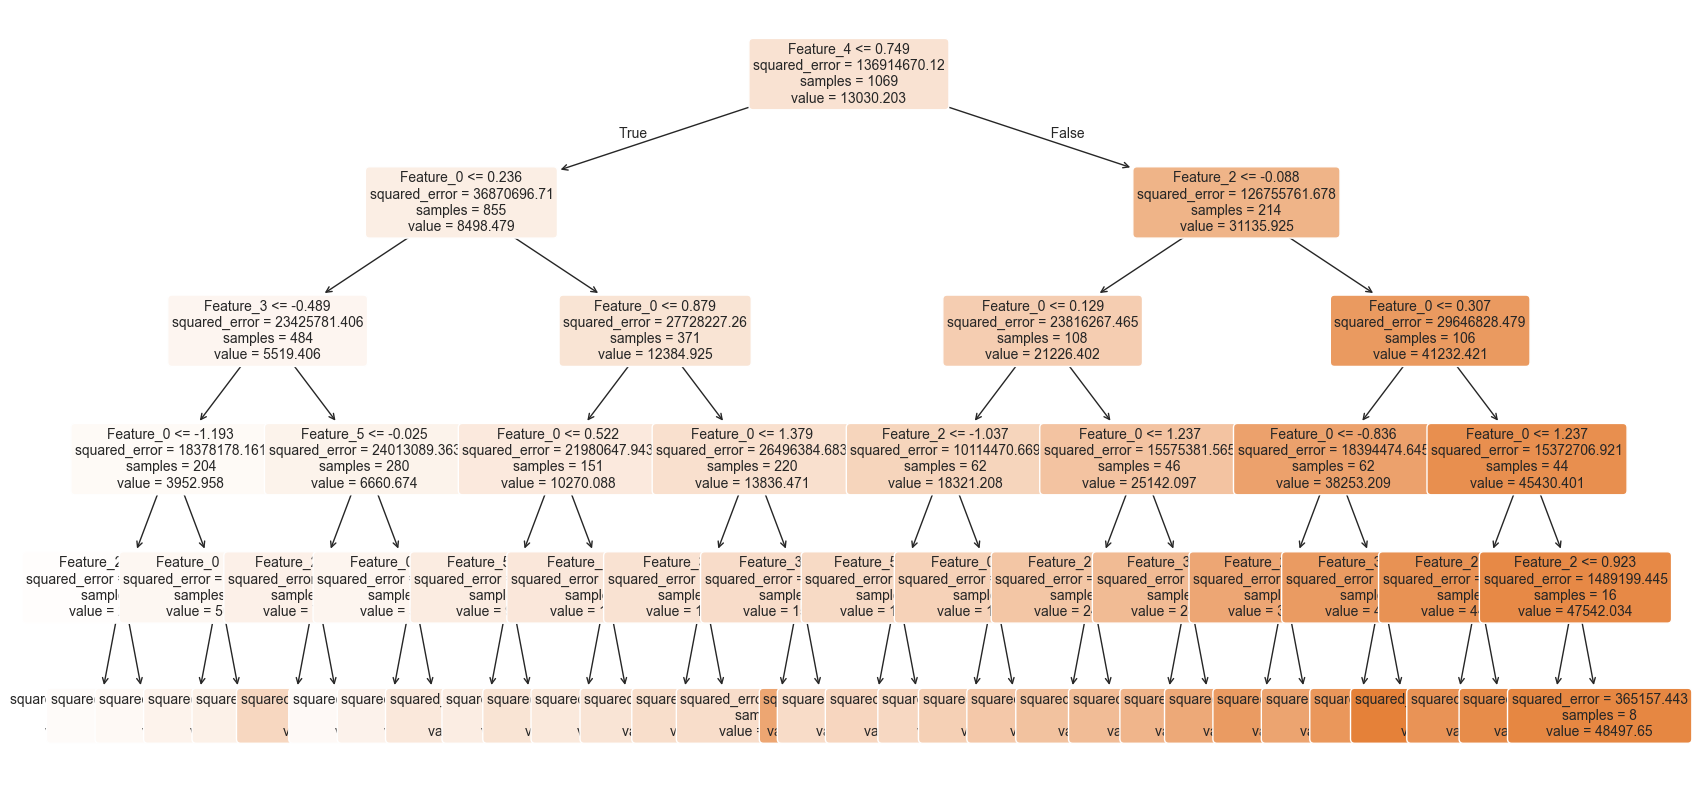

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Increase figure size

# Use X_train_df.columns instead of X_train.columns
plot_tree(dt_model, feature_names=X_train_df.columns, filled=True, rounded=True, fontsize=10)
plt.show()


In [57]:
Y_pred_dt = dt_model.predict(X_test)
print(Y_pred_dt[:10])  # Print first 10 predictions


[12504.994375    4098.15382154 10370.81956067 42308.45045474
  6703.78818704 10370.81956067 35238.57569393  1827.31476444
  8761.53306468 10370.81956067]


In [58]:
import numpy as np

new_person = np.array([[35, 28.5, 1, 2, 3, 0]])  # Add missing feature
 # 2D array for prediction
predicted_price = dt_model.predict(new_person)
print(f"Predicted Insurance Cost: ${predicted_price[0]:.2f}")



Predicted Insurance Cost: $48497.65


In [60]:
print(X_train.shape)  # Check number of columns in training data


(1069, 6)


In [61]:
#52,female,30.78,1,no,northeast,10797.3362


In [62]:
dt_model.predict([[52,1,30.78,1,0,1]])

array([15043.57581905])

In [63]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
